In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm


# Dataset Import

In [8]:
# Import the dataset
data = pd.read_csv('test.csv')


# Data Cleansing

In [9]:
# Check the first 5 rows of the dataset
data.head(5)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [10]:
# Summarize the dataset
data.shape


(25976, 25)

In [11]:
# Summarize the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [12]:
# Drop unnecessary and empty columns
data = data.drop(['Unnamed: 0','id'], axis = 1)


In [13]:
# Check the null values
data.isnull().sum()


Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [14]:
# Remove missing values
data.dropna(axis=0, inplace=True)

# Check again for null values
data.isnull().sum()


Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [15]:
# List categorical & numeric varaibles
cate_features = list(data.columns)[0:2]+list(data.columns)[3:5]
nume_features = list(data.columns)[2:3]+list(data.columns)[5:6]+list(data.columns)[20:22]

# Convert categorical columns to categorical data type
data[cate_features] = data[cate_features].astype('category')

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             25893 non-null  category
 1   Customer Type                      25893 non-null  category
 2   Age                                25893 non-null  int64   
 3   Type of Travel                     25893 non-null  category
 4   Class                              25893 non-null  category
 5   Flight Distance                    25893 non-null  int64   
 6   Inflight wifi service              25893 non-null  int64   
 7   Departure/Arrival time convenient  25893 non-null  int64   
 8   Ease of Online booking             25893 non-null  int64   
 9   Gate location                      25893 non-null  int64   
 10  Food and drink                     25893 non-null  int64   
 11  Online boarding                    25893 

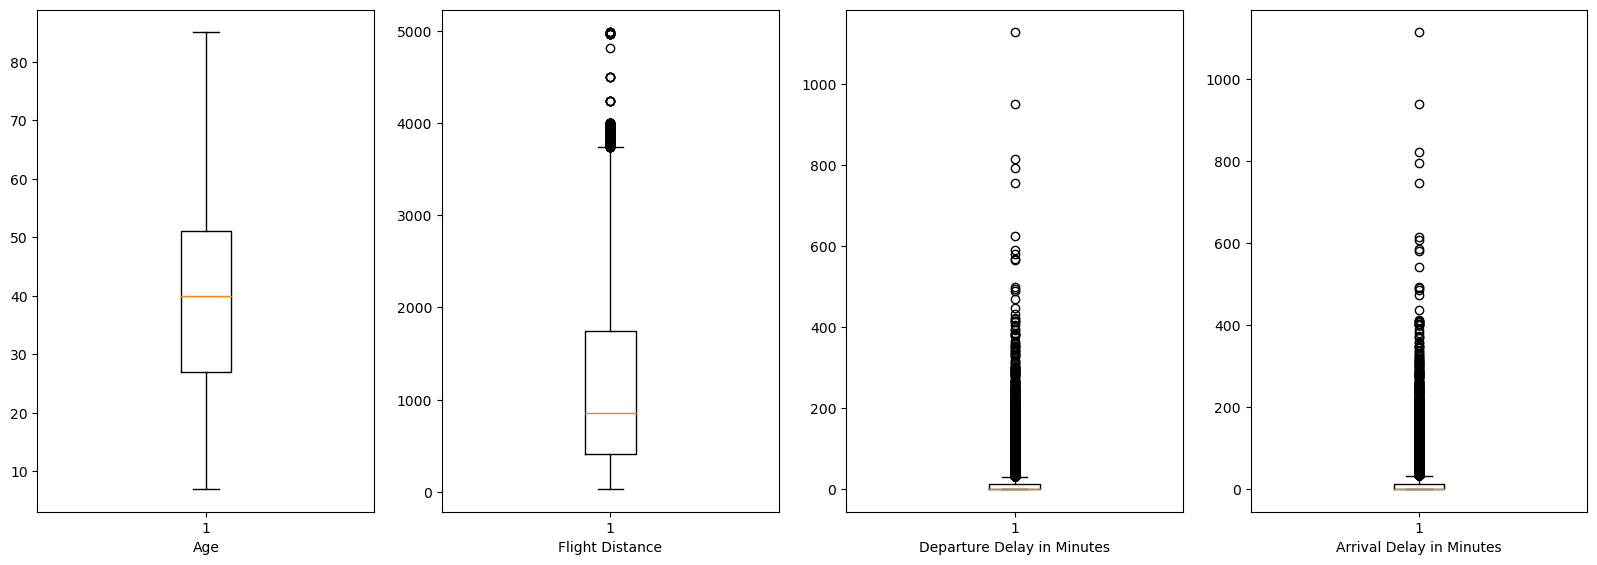

In [16]:
# Check for outliers in numerical columns
j = 1
fig = plt.figure(figsize = (20, 30))

for i in nume_features:
    plt.subplot(4,4,j)
    plt.boxplot(data[i])
    j += 1
    plt.xlabel(i)
    
plt.show()


# Exploratory Data Analysis

### Target Variable

In [17]:
# Check the number of observations for the target variable
data.groupby('satisfaction').size()


satisfaction
neutral or dissatisfied    14528
satisfied                  11365
dtype: int64

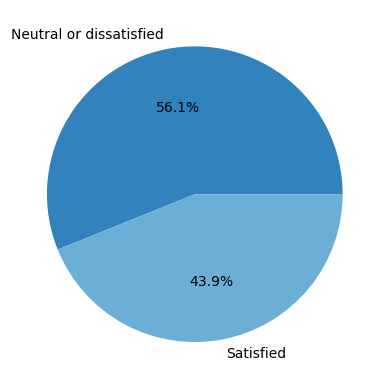

In [18]:
plt.pie(data.satisfaction.value_counts(),labels=["Neutral or dissatisfied","Satisfied"],colors=sns.color_palette("tab20c"),
        autopct ='%1.1f%%')
plt.show()


### Numeric Variables

In [19]:
# Summarize the numeric data
data[nume_features].describe()


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,25893.000000,25893.000000,25893.000000,25893.000000
mean,39.621983,1193.753254,14.225080,14.740857
std,15.134224,998.626779,37.185919,37.517539
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,849.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1128.000000,1115.000000


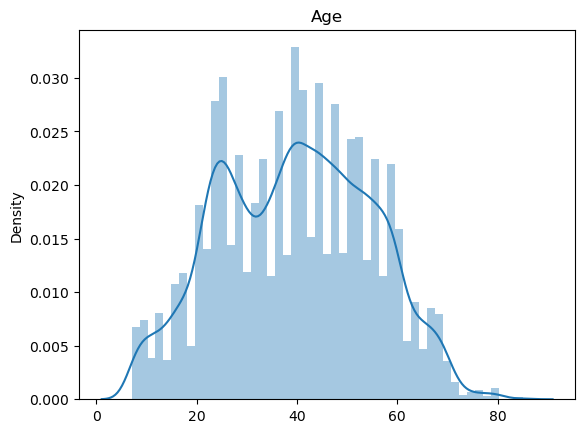

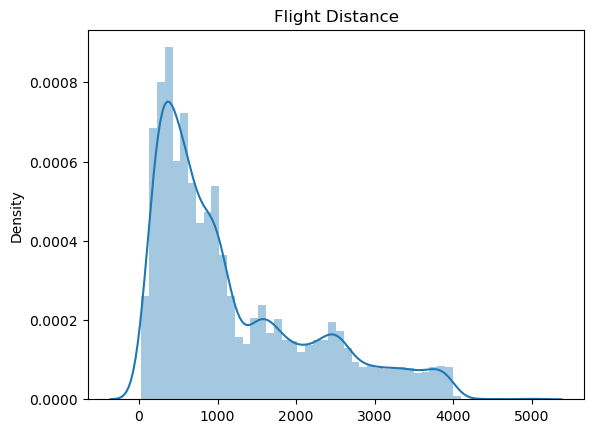

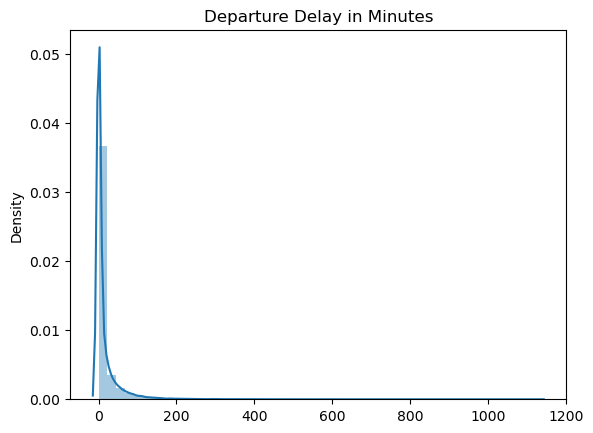

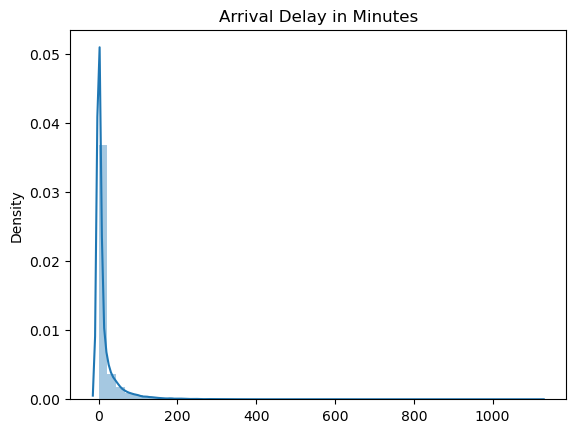

In [20]:
# Check the distributions for each numeric variable
for i in nume_features:
    plt.title(i)
    sns.distplot(x = data[i])
    
    plt.xticks()
    plt.show()


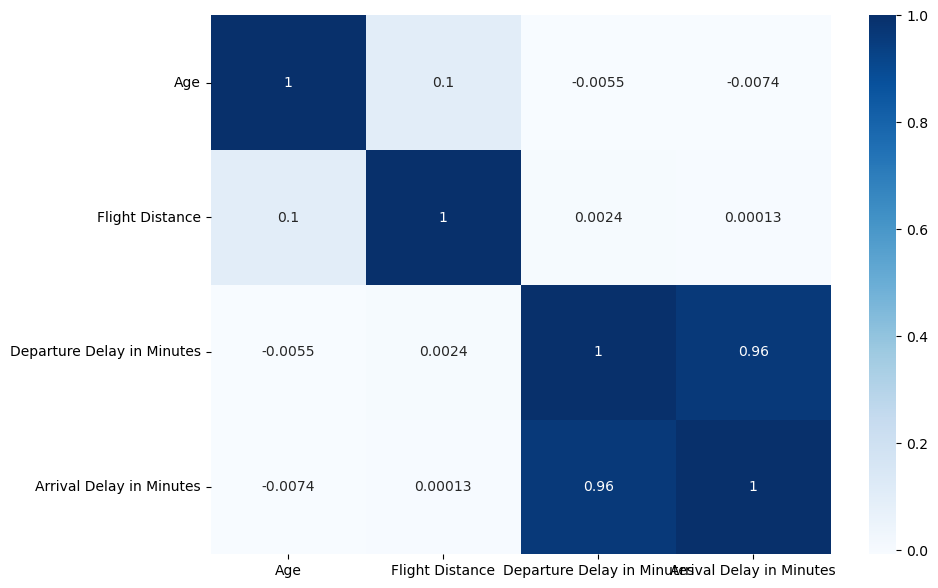

In [21]:
# Plot the correlation map for numeric variables
plt.figure(figsize=(10,7))
sns.heatmap(data[nume_features].corr(),annot=True,cmap='Blues')
plt.xticks(rotation = 0)
plt.show()


### Categorical Variables

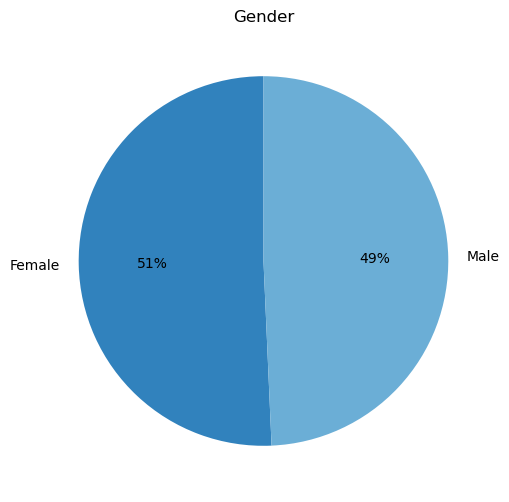

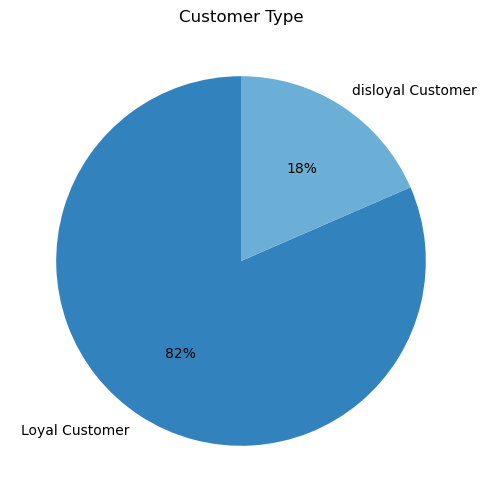

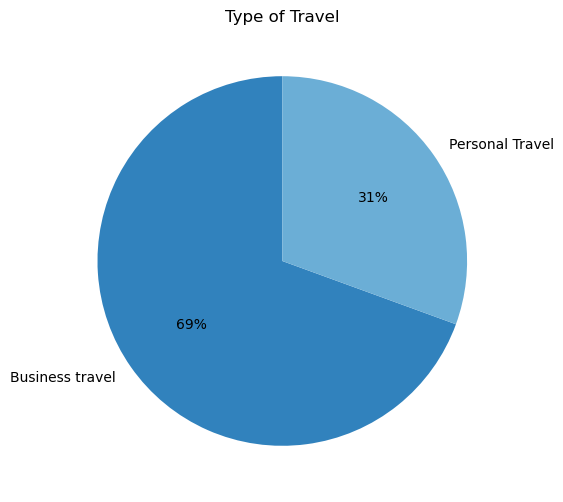

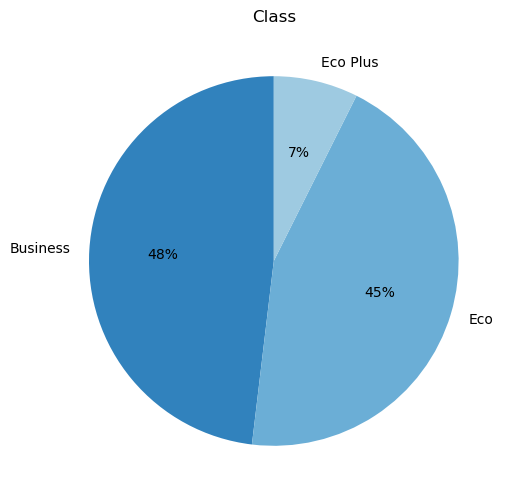

In [22]:
# Visualize categorical variables
for i in cate_features:
    plt.figure(figsize=(6,6))
    plt.title(i)
    column_values = data[i].value_counts()
    labels = column_values.index
    sizes = column_values.values
    plt.pie(sizes,labels = labels,colors = sns.color_palette('tab20c'),autopct = '%1.0f%%',startangle = 90)
    
    plt.xticks()
    plt.show()
    

# Data Modeling

In [23]:
# Label encoding
data['Gender'] = data['Gender'].replace('Male',0)
data['Gender'] =data['Gender'].replace('Female',1)

data['Customer Type'] = data['Customer Type'].replace('disloyal Customer',0)
data['Customer Type'] = data['Customer Type'].replace('Loyal Customer',1)

data['Type of Travel'] = data['Type of Travel'].replace('Personal Travel',0)
data['Type of Travel'] = data['Type of Travel'].replace('Business travel',1)

data['Class'] = data['Class'].replace('Eco',0)
data['Class'] = data['Class'].replace('Eco Plus',1)
data['Class'] = data['Class'].replace('Business',2)

data['satisfaction'] = data['satisfaction'].replace('neutral or dissatisfied',0)
data['satisfaction'] = data['satisfaction'].replace('satisfied',1)

data.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [24]:
sum = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']  # a Series
# and
data['Total Delay'] = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes'] 

In [25]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,2,5,5,50,44.0,1,94.0
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,3,4,5,0,0.0,1,0.0
2,0,0,20,1,0,192,2,0,2,4,...,4,1,3,2,2,2,0,0.0,0,0.0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,3,1,4,0,6.0,1,6.0
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,4,2,4,0,20.0,1,20.0


In [26]:
data=data.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [27]:
X = data.drop(['satisfaction'], axis = 1)
y = data['satisfaction']


In [28]:
# Nomalization of numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [29]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)


In [30]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [31]:
model = sm.Logit(y_train, X_train)

In [32]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.346788
         Iterations 7


In [33]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                20714
Model:                          Logit   Df Residuals:                    20693
Method:                           MLE   Df Model:                           20
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                  0.4943
Time:                        19:03:23   Log-Likelihood:                -7183.4
converged:                       True   LL-Null:                       -14205.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0766      0.021     -3.591      0.000      -0.118      -0.035
x2             0.8130      0.025     32.951      0.000       0.765       0.861
x3            -0.1340      0.023     -5.856      0.0

### Logistic Regression

In [34]:
# Fit a logistic regression model to the training set
log = LogisticRegression(random_state=42)
lr_model = log.fit(X_train,y_train)

# Predict the test set results
y_pred_lr = lr_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2916
           1       0.86      0.82      0.84      2263

    accuracy                           0.86      5179
   macro avg       0.86      0.86      0.86      5179
weighted avg       0.86      0.86      0.86      5179



In [35]:
# Print out the model results
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("The accuracy of the logistic regression model is " + str(round(lr_accuracy*100, 2)) + "% at a precision rate of " + 
      str(round(lr_precision*100, 2)) + "% with a recall score of " + str(round(lr_recall*100, 2)) + 
      "%, and the F1 score is " + str(round(lr_f1, 2)) + ".")


The accuracy of the logistic regression model is 86.33% at a precision rate of 85.91% with a recall score of 82.19%, and the F1 score is 0.84.


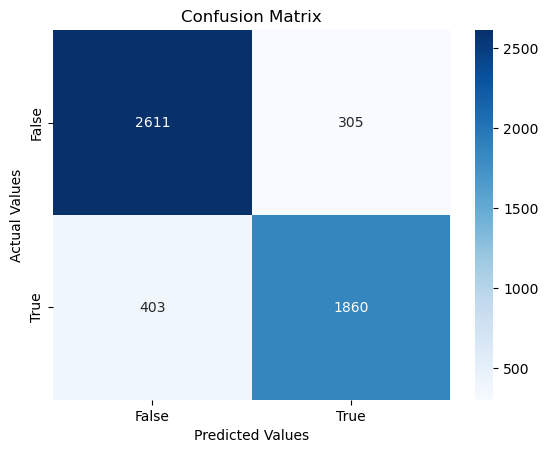

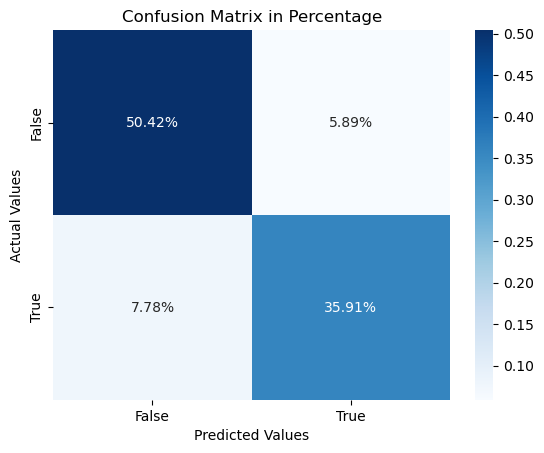

In [36]:
# Creat a confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
ax_lr = sns.heatmap(cm_lr, annot = True, cmap = "Blues", fmt = "3g")

ax_lr.set_title("Confusion Matrix")
ax_lr.set_xlabel("Predicted Values")
ax_lr.set_ylabel("Actual Values")
ax_lr.set_xticklabels(["False", "True"])
ax_lr.set_yticklabels(["False", "True"])

plt.show()

# Plot the confusion matrix in percentage
ax_lr_p = sns.heatmap(cm_lr/np.sum(cm_lr), annot = True, fmt = "0.2%", cmap = "Blues")

ax_lr_p.set_title("Confusion Matrix in Percentage");
ax_lr_p.set_xlabel("Predicted Values")
ax_lr_p.set_ylabel("Actual Values");
ax_lr_p.set_xticklabels(["False", "True"])
ax_lr_p.set_yticklabels(["False", "True"])

plt.show()


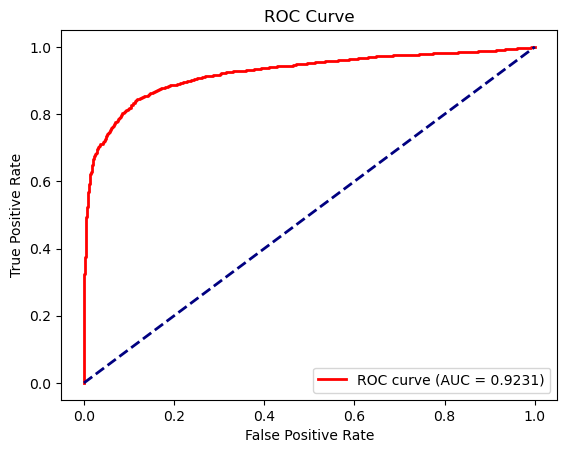

In [37]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, auc
pred_prob = lr_model.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test, pred_prob[:,1])
roc_auc =auc(fpr,tpr)
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (AUC = %0.4f)'%roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()


### Decision Tree

In [38]:
# Fit a decision tree model to the training set
dt = DecisionTreeClassifier(max_depth = 3)
dt_model = dt.fit(X_train, y_train)

# Predict the test set results
y_pred_dt = dt_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2916
           1       0.84      0.91      0.88      2263

    accuracy                           0.89      5179
   macro avg       0.88      0.89      0.89      5179
weighted avg       0.89      0.89      0.89      5179



In [39]:
# Print out the model results
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("The accuracy of the desicion tree model is "+str(round(dt_accuracy*100, 2))+"% at a precision rate of "+ 
      str(round(dt_precision*100, 2))+"% with a recall score of "+str(round(dt_recall*100, 2))+
      "%, and the F1 score is " + str(round(dt_f1, 2)) + ".")


The accuracy of the desicion tree model is 88.61% at a precision rate of 84.05% with a recall score of 91.25%, and the F1 score is 0.88.


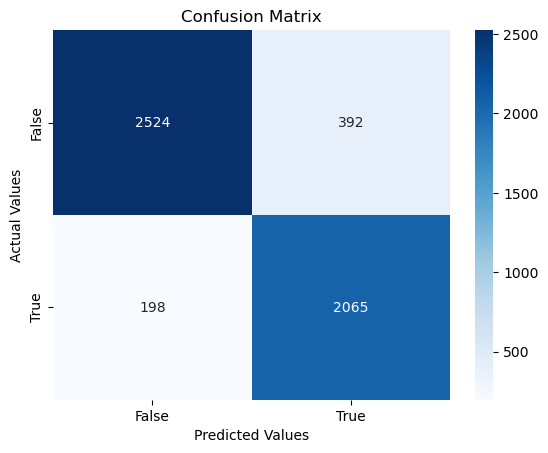

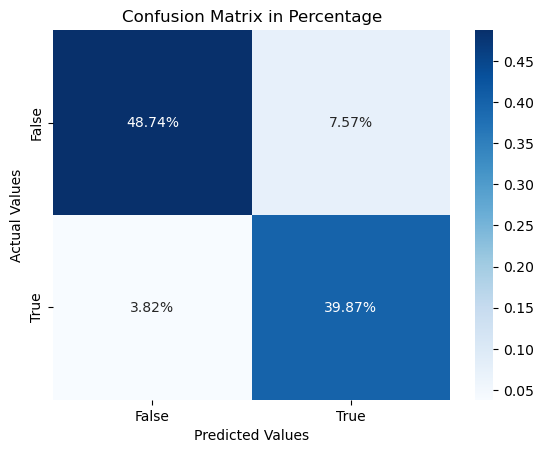

In [40]:
# Creat a confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
ax_dt = sns.heatmap(cm_dt, annot = True, cmap = "Blues", fmt = "3g")

ax_dt.set_title("Confusion Matrix")
ax_dt.set_xlabel("Predicted Values")
ax_dt.set_ylabel("Actual Values")
ax_dt.set_xticklabels(["False", "True"])
ax_dt.set_yticklabels(["False", "True"])

plt.show()

# Plot the confusion matrix in percentage
ax_dt_p = sns.heatmap(cm_dt/np.sum(cm_dt), annot = True, fmt = "0.2%", cmap = "Blues")

ax_dt_p.set_title("Confusion Matrix in Percentage");
ax_dt_p.set_xlabel("Predicted Values")
ax_dt_p.set_ylabel("Actual Values");
ax_dt_p.set_xticklabels(["False", "True"])
ax_dt_p.set_yticklabels(["False", "True"])

plt.show()


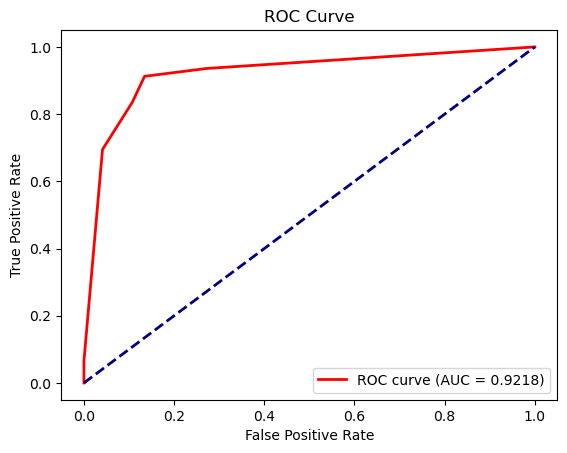

In [41]:
# Plot the ROC curve
pred_prob = dt_model.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test, pred_prob[:,1])
roc_auc =auc(fpr,tpr)
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (AUC = %0.4f)'%roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()


In [42]:
# Find out the best tree depth for highest model accuracy
depth_list = list(range(2,20))
accuracy = []

for i in depth_list:
    tree = DecisionTreeClassifier(max_depth = i)
    model = tree.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred))
    
max_accuracy = round(max(accuracy)*100, 2)
best_depth = depth_list[accuracy.index(max(accuracy))]

print('The highest accuracy of the decision tree model is '+str(max_accuracy)+'% with the depth of '+str(best_depth)+'.')


The highest accuracy of the decision tree model is 94.38% with the depth of 11.


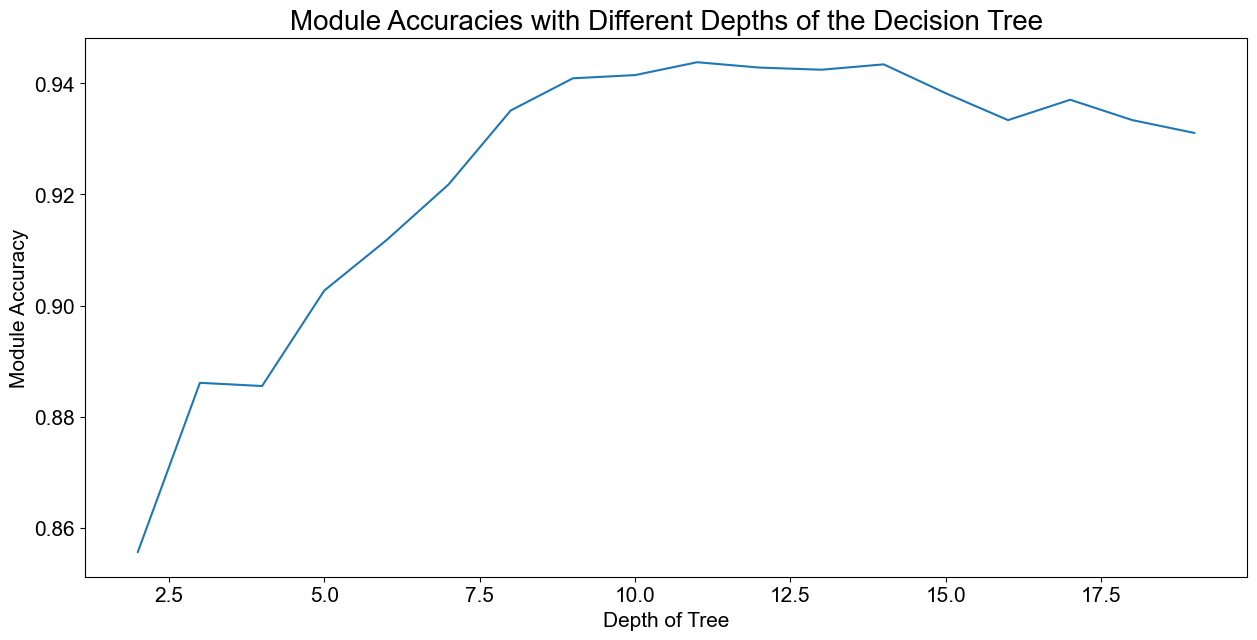

In [43]:
# Plot module accuracies with different depths
plt.figure(figsize = (15,7))
plt.title("Module Accuracies with Different Depths of the Decision Tree",fontsize=20)
plt.xlabel("Depth of Tree",fontsize=15)
plt.ylabel("Module Accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.set_style("whitegrid")
plt.plot(depth_list,accuracy)

plt.show()


In [44]:
# Fit a decision tree model to the training set with the best depth of 11
dt = DecisionTreeClassifier(max_depth = 11)
dt_model = dt.fit(X_train, y_train)

# Predict the test set results
y_pred_dt = dt_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2916
           1       0.94      0.93      0.94      2263

    accuracy                           0.94      5179
   macro avg       0.94      0.94      0.94      5179
weighted avg       0.94      0.94      0.94      5179



In [45]:
# Print out the model results
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("The highest accuracy of the desicion tree model is "+str(round(dt_accuracy*100, 2))+"% at a precision rate of "+ 
      str(round(dt_precision*100, 2))+"% with a recall score of "+str(round(dt_recall*100, 2))+
      "%, and the F1 score is " + str(round(dt_f1, 2)) + ".")


The highest accuracy of the desicion tree model is 94.42% at a precision rate of 94.18% with a recall score of 92.97%, and the F1 score is 0.94.


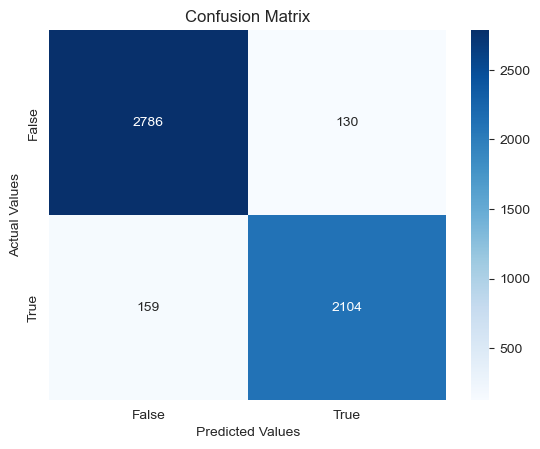

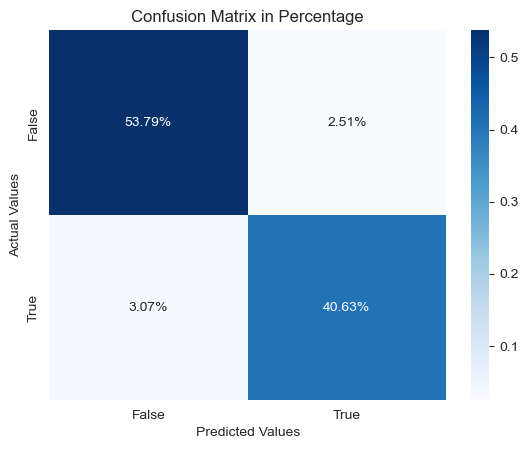

In [46]:
# Creat a confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
ax_dt = sns.heatmap(cm_dt, annot = True, cmap = "Blues", fmt = "3g")

ax_dt.set_title("Confusion Matrix")
ax_dt.set_xlabel("Predicted Values")
ax_dt.set_ylabel("Actual Values")
ax_dt.set_xticklabels(["False", "True"])
ax_dt.set_yticklabels(["False", "True"])

plt.show()

# Plot the confusion matrix in percentage
ax_dt_p = sns.heatmap(cm_dt/np.sum(cm_dt), annot = True, fmt = "0.2%", cmap = "Blues")

ax_dt_p.set_title("Confusion Matrix in Percentage");
ax_dt_p.set_xlabel("Predicted Values")
ax_dt_p.set_ylabel("Actual Values");
ax_dt_p.set_xticklabels(["False", "True"])
ax_dt_p.set_yticklabels(["False", "True"])

plt.show()


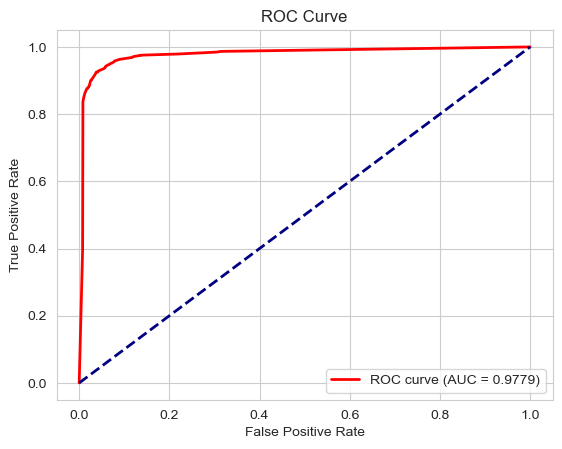

In [47]:
# Plot the ROC curve
pred_prob = dt_model.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test, pred_prob[:,1])
roc_auc =auc(fpr,tpr)
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (AUC = %0.4f)'%roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()


### Feature Importance

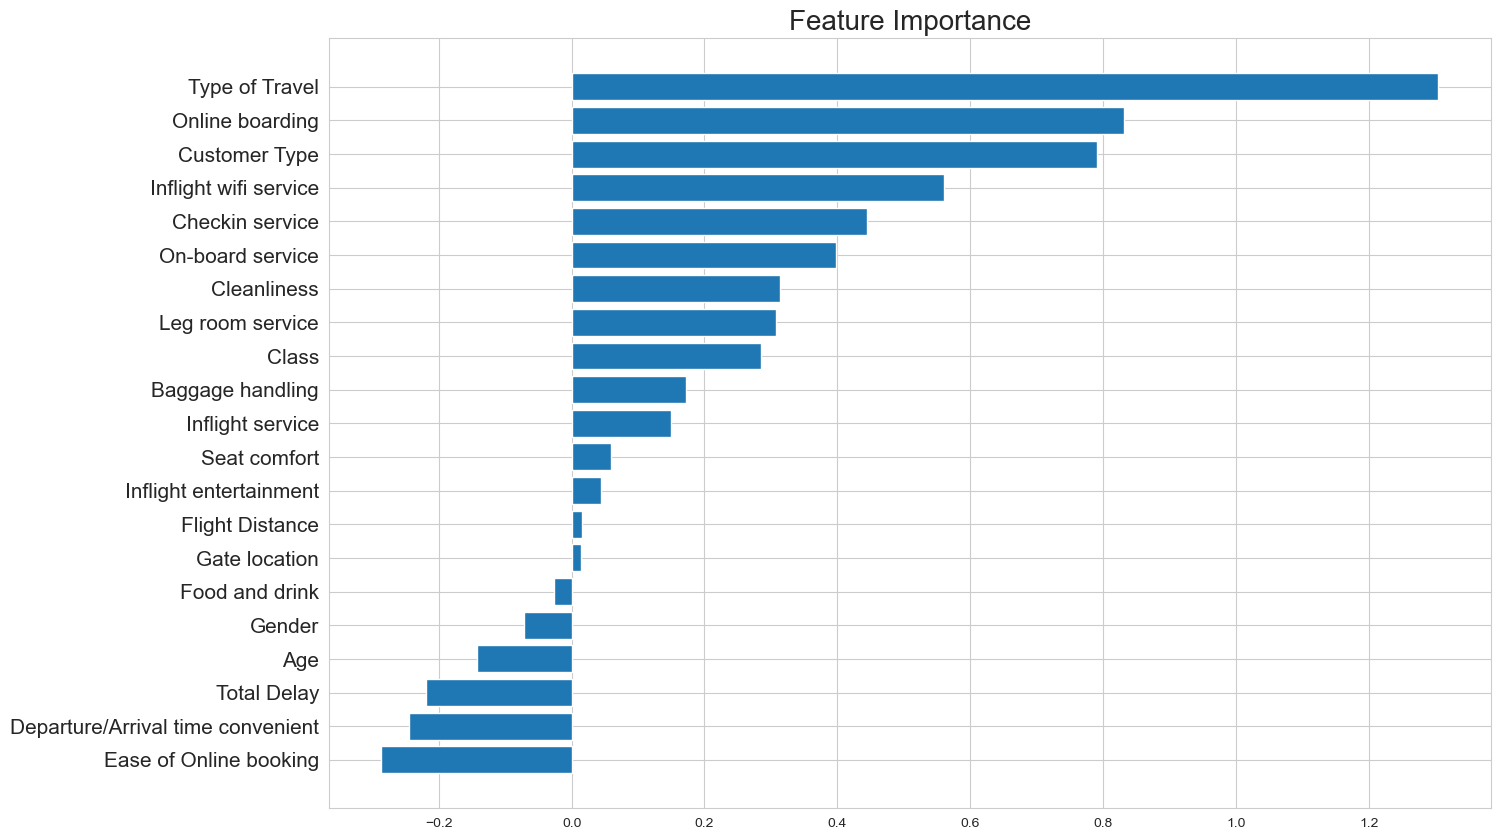

In [48]:
# Determine the most contributing features
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize = (15,10))
    plt.barh(range(len(names)), imp, align='center')
    plt.title("Feature Importance",fontsize=20)
    plt.yticks(range(len(names)),names,fontsize=15)
    plt.show()

f_importances(lr_model.coef_[0],data.drop(['satisfaction'],axis=1).columns.values)


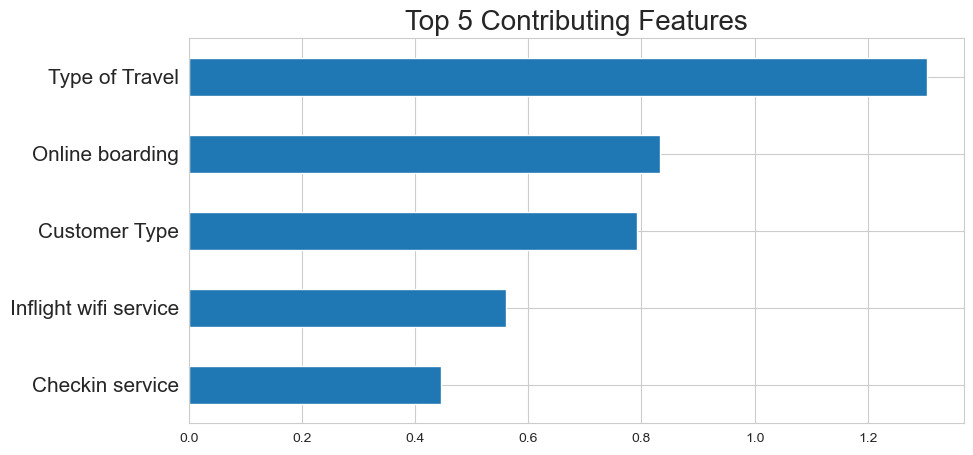

In [49]:
# Plot the top 5 contributing features
plt.figure(figsize = (10,5))
ax = pd.Series(abs(lr_model.coef_[0]),index=data.drop(['satisfaction'],axis=1).columns.values).nlargest(5)
ax.plot(kind='barh').invert_yaxis()
plt.title("Top 5 Contributing Features",fontsize=20)
plt.yticks(fontsize=15)
plt.show()


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 101)


In [51]:
dt = DecisionTreeClassifier(max_depth = 3)
dt_model = dt.fit(X_train, y_train)

# Predict the test set results
y_pred_dt = dt_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2939
           1       0.85      0.91      0.88      2240

    accuracy                           0.89      5179
   macro avg       0.89      0.89      0.89      5179
weighted avg       0.89      0.89      0.89      5179



In [52]:
# Print out the model results
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("The accuracy of the desicion tree model is "+str(round(dt_accuracy*100, 2))+"% at a precision rate of "+ 
      str(round(dt_precision*100, 2))+"% with a recall score of "+str(round(dt_recall*100, 2))+
      "%, and the F1 score is " + str(round(dt_f1, 2)) + ".")

The accuracy of the desicion tree model is 89.01% at a precision rate of 84.57% with a recall score of 91.25%, and the F1 score is 0.88.


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [54]:
dt = DecisionTreeClassifier(max_depth = 3)
dt_model = dt.fit(X_train, y_train)

# Predict the test set results
y_pred_dt = dt_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2844
           1       0.84      0.91      0.88      2335

    accuracy                           0.88      5179
   macro avg       0.88      0.89      0.88      5179
weighted avg       0.89      0.88      0.88      5179



In [55]:
# Print out the model results
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("The accuracy of the desicion tree model is "+str(round(dt_accuracy*100, 2))+"% at a precision rate of "+ 
      str(round(dt_precision*100, 2))+"% with a recall score of "+str(round(dt_recall*100, 2))+
      "%, and the F1 score is " + str(round(dt_f1, 2)) + ".")

The accuracy of the desicion tree model is 88.43% at a precision rate of 84.47% with a recall score of 91.09%, and the F1 score is 0.88.


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 201)

In [57]:
dt = DecisionTreeClassifier(max_depth = 3)
dt_model = dt.fit(X_train, y_train)

# Predict the test set results
y_pred_dt = dt_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2900
           1       0.84      0.90      0.87      2279

    accuracy                           0.88      5179
   macro avg       0.88      0.88      0.88      5179
weighted avg       0.88      0.88      0.88      5179



In [58]:
# Print out the model results
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("The accuracy of the desicion tree model is "+str(round(dt_accuracy*100, 2))+"% at a precision rate of "+ 
      str(round(dt_precision*100, 2))+"% with a recall score of "+str(round(dt_recall*100, 2))+
      "%, and the F1 score is " + str(round(dt_f1, 2)) + ".")

The accuracy of the desicion tree model is 88.13% at a precision rate of 83.85% with a recall score of 90.43%, and the F1 score is 0.87.
